# Data science candidate exercise

Thank you for working on the Takt Data Science Exercise! The purpose of this exercise is to allow you to showcase your Data Science skill set in the following areas:
 * Transforming data
 * Training and tuning of model parameters
 * Evaluation of model performance and selecting the optimal model 
 
In addition to these areas, we’re interested in seeing how you utilize code to explore a new data set to both explore data and model performance and develop/implement models in our code base. 


As you work on the exercise, keep in mind that we value reusable code that your teammates can jump into quickly, so please be sure to comment frequently, and let us know which portions of your code you would use for more formal development to showcase your skills in coding style best practices.

We also encourage you to use markdown cells to explain your thought process and observations as you move through the exercise. Feel free to use the software and toolbox of your own preference. 


### Timing and Questions
We understand that your time is valuable, while you are welcome to spend as much time as you desire on the exercise, please do not feel obligated to spend more than 2-4 hours.
 
* Questions are encouraged:
    * Please feel welcome to contact your TAKT recruiter with any questions you might have for Takt that may help clarify what is expected, or you have questions about the data or other items for our data science team.

# Problem Statement

In this exercise, we would like to build collaborative filtering models for recommending product items. Imagine a fast food chain releases a new mobile app allowing its customers to place orders before they even have to walk into the store. There are several opportunities for the app to show recommendations: When a customer first tap on the "order" page, we may recommend the first item to be added to the basket (e.g. a burger). After that, items good for pairing with the existing basket could be recommended. For example, if there is a burger already in the order basket, the app may want to recommend fries and/or drinks, rather than recommending another burger.


## Input data
We provide the artificial transaction history data in `trx_data.csv`. Each row represents a past order. It has two columns - customerId and products (separated by ","). The products column contains 1 to 10 product ID(s) of those being purchased, separated by "|".

Here is an example of the transaction records. You can find customer 0 purchased 1 item, and customer 1 purchased 10 items (some are duplicated).

`customerId,products
0,20
1,2|2|23|68|68|111|29|86|107|152
2,111|107|29|11|11|11|33|23
3,164|227
5,2|2
6,144|144|55|267
7,136|204|261
8,79|8|8|48
9,102|2|2|297
10,84|77|286|259
11,25|127|127
12,18|183|288|171|289
13,79|8|8|38
14,2|2|20|20|20
15,251|143
`

***Things to be aware of about the data.***
* The `trx_data.csv` is a log of user purcases, so:
    * Users might be found on multiple lines in the csv with different basket items attached.
    * The products "basket" is not listed in any particular order.
        * For example the following data points can be considered as equivelent
            * `6,144|144|55|267` 
            * `6,267|144|55|144`

## Models
A collaborative filtering model can be built once given a user-item matrix with ratings. 
For this exercise, we ask tou to build **ONE** of the following two recommender models. 

### Option 1:
* Build a Model that recommends to the user the "first item" they may want to place into their "basket"
  * Input: user - customer ID
  * Returns: ranked list of items (product IDs), that the user is most likely to want to put in his/her (empty) "basket"

### Option 2:
* Build a Model for the recommending a "second item" after the first item has already been added to the basket.
  * Input: (user - customer ID, item - product ID)
  * Returns: ranked list of items (product IDs), that the user is most likely to want to put in his/her (empty) "basket"




## Tasks

Some of the things we will be looking at as we review your submission include:

### 1. Data transformation
How are you converting the raw data as you prepare a model? Please feel welcome to define and transform the ratings in the way you think would be optimal for generating the best possible product recommendations.

### 2. Model selection and development
What algorithms did you consider using in order to develop the collaborative filtering model?  Why did you end up selecting the algorithm you ended up using.  How did you end up implementing the selected model?

### 3. Validate and evaluate the model performance
During the training process, what steps did you use for validating and evaluating the model?
* What holdout practices did you use?
* What performance metrics did you for validation and testing?
* How did you choose to present your results?
* What actions did you take or improvements did you make based on your results?

### 4. Apply model to test datasets
##### Option 1 Model
In `recommend_1.csv`, we provide a list of customer IDs. If you select option 1, use this data to generate a csv file that indicates top 10 recommendations for each of the customers. Note the order of the recommended products should be ordered by user preference, with the most preferred item in the beginning.

Sample output:

`customerId, recommendedProducts
1,0|1|2|3|4|5|6|7|8|9
2,8|3|1|2|4|7|9|10|11|13
3,20|21|22|23|24|25|26|27|28|29
...
`

##### Option 2 Model
In recommend_2.csv, we provide a list of customer IDs and their first basket item. If you select option 2, use this data to generate a csv file that indicates top 10 pairing recommendations for each of the customer-basket combinations. Note the order of the recommended products should be ordered by user preference, with the most preferred item in the beginning.

Sample output:

`customerId, itemId, recommendedProducts
1,0,1|2|3|4|5|6|7|8|9|10
1,1,0|2|3|4|5|6|7|8|9|10
2,8,20|21|22|23|24|25|26|27|28|29
...
`


## Notes on the business use case for evaluation
* The goal of this modeling project is to recommend to the user a list of items that they are most likely to purchase (option 1) or add to their existing basket (option 2).  
* As you are selecting metrics, please keep in mind that 
 1. the primary goal is to successfully recommend as many items in your list that they may be inclined to purchase/add, and 
 2. the secondary goal is that the items are ordered by the user's inclination (the more inclined they are, the higher up in your list of 10 recommendations.

## Notes on implementation options

For implementation of your modeling solution(s), please feel free to use any method that might be added to production were you to use it for development as a Takt employee. 

For example:
* If you find an open source project licensed under e.g. the Apache 2.0 license or another license open for comercial purposes, you are welcome to use it for your code, or
* If you feel like coding up a solution from scratch (assuming you have the time) you are welcome to do that as well.


## My Solution

I implemented two solutions in Haskell, a simpler one based on a k Nearest Neighbors approach using Jaccard distance, and a more involved low-rank matrix factorization (MF) approach based on the method of Hu, Koren, and Volinsky in [Collaborative Filtering for Implicit Feedback Datasets](http://yifanhu.net/PUB/cf.pdf). The code is separately documented, and can be found in the included project (the `test` folder is a good place to start). I feel that Haskell promotes reproducible results and resuable code better than Python, and this is the sort of development I would like to do at Takt.

However you have provided me with a notebook, so I am also includong a more typical data scientist solution (below) in order to walk through my process using Python. This solution again uses the MF method of Hu, Koren, and Volinsky. The main difference between the Haskell and Python solutions is that I wrote the Haskell one from scratch using a stochastic gradient descent (SGD) optimizer, and the Python one uses the alternating least squares (ALS) solver in Ben Frederickson's [implicit](https://github.com/benfred/implicit) library.

The `data` folder contains the recommedation files for all three solutions (`data/recommend_1-KNN.csv`, `data/recommend_1-SGD.csv` and `data/recommend_1-ALS.csv`). 

## Preprocessing the Data

In [3]:
import pandas as pd
import scipy.sparse as sparse
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve

In [225]:
customers = list(np.sort(grouped_purchased.CustomerID.unique())) # Get our unique customers
products = list(grouped_purchased.StockCode.unique()) # Get our unique products that were purchased
quantity = list(grouped_purchased.Quantity) # All of our purchases

print len(customers)
print len(products)
print len(quantity)

rows = grouped_purchased.CustomerID.astype('category', categories = customers).cat.codes 
# Get the associated row indices
cols = grouped_purchased.StockCode.astype('category', categories = products).cat.codes 
# Get the associated column indices
purchases_sparse = sparse.csr_matrix((quantity, (rows, cols)), shape=(len(customers), len(products)))

24381
300
132638


Note that most of the data processing work was done in Haskell, since I implemented the other two solutions first. In particular `data/trx_unbatched.csv` was generated by the `convert` function in `Main.hs`.

In [250]:
purchases = pd.read_csv("data/trx_unbatched.csv")
purchases.head()

,customerId,itemId,quantity
0,0,1,2
1,0,13,1
2,0,19,3
3,0,20,1
4,0,31,2


Instead of representing an explicit rating, the purchase quantity can represent a "confidence" in terms of how strong the interaction was. Items with a larger number of purchases by a customer can carry more weight in our ratings matrix of purchases. 

Our last step is to create the sparse ratings matrix of users and items utilizing the code below:

In [251]:
customers = list(np.sort(purchases.customerId.unique())) # Get our unique customers
products = list(purchases.itemId.unique()) # Get our unique products that were purchased
quantity = list(purchases.quantity) # All of our purchases

print len(customers)
print len(products)
print len(quantity)

rows = purchases.customerId.astype('category', categories = customers).cat.codes 
# Get the associated row indices
cols = purchases.itemId.astype('category', categories = products).cat.codes 
# Get the associated column indices
purchases_sparse = sparse.csr_matrix((quantity, (rows, cols)), shape=(len(customers), len(products)))

24429
300
133585


Let's check our final matrix object:

In [29]:
purchases_sparse

<24429x300 sparse matrix of type '<type 'numpy.int64'>'
	with 133585 stored elements in Compressed Sparse Row format>

We have 24429 customers with 300 items. For these user/item interactions, 133585 of these items had a purchase. In terms of sparsity of the matrix, that means:

In [87]:
matrix_size = purchases_sparse.shape[0]*purchases_sparse.shape[1] # Number of possible interactions in the matrix
num_purchases = float(len(purchases_sparse.nonzero()[0])) # Number of items interacted with
sparsity = 100.0*(1 - (num_purchases/matrix_size))
sparsity

98.17723470738329

98.2% of the interaction matrix is sparse. For collaborative filtering to work, the maximum sparsity you could get away with would probably be about 99.5% or so. We are well below this, so we should be able to get decent results. 

## Creating a Training and Validation Set

Typically in ML applications, you test the model by creating a test set completely separate from the training set. Usually this is fairly simple: just take a random sample of the training example rows in our feature matrix and separate it away from the training set. 

With collaborative filtering it's slightly more involved because you need all of the user/item interactions to find the proper dimensions for the matrix. One approach is to hide a certain percentage of the user/item interactions from the model during the training phase chosen at random. Then, check during the test phase how many of the items that were recommended the user actually ended up purchasing in the end. Ideally, you would ultimately test your recommendations with some kind of A/B test or utilizing data from a time series where all data prior to a certain point in time is used for training while data after a certain period of time is used for testing. 

Our test set is an exact copy of our original data. The training set, however, will mask a random percentage of user/item interactions and act as if the user never purchased the item. We then check in the test set which items were recommended to the user that they ended up actually purchasing. If the users frequently ended up purchasing the items most recommended to them by the system, we can conclude the system seems to be working. 

As an additional check, we can compare our system to simply recommending the most popular items to every user. This will be our baseline. This method of testing isn't necessarily the "correct" answer, because it depends on how you want to use the recommender system. However, it is a practical way of testing performance I will use for this example.

Now that we have a plan on how to separate our training and testing sets, let's create a function that can do this for us.

In [33]:
import random

In [34]:
def make_train(ratings, pct_test = 0.2):
    '''
    This function will take in the original user-item matrix and "mask" a percentage of the original ratings where a
    user-item interaction has taken place for use as a test set. The test set will contain all of the original ratings, 
    while the training set replaces the specified percentage of them with a zero in the original ratings matrix. 
    
    parameters: 
    
    ratings - the original ratings matrix from which you want to generate a train/test set. Test is just a complete
    copy of the original set. This is in the form of a sparse csr_matrix. 
    
    pct_test - The percentage of user-item interactions where an interaction took place that you want to mask in the 
    training set for later comparison to the test set, which contains all of the original ratings. 
    
    returns:
    
    training_set - The altered version of the original data with a certain percentage of the user-item pairs 
    that originally had interaction set back to zero.
    
    test_set - A copy of the original ratings matrix, unaltered, so it can be used to see how the rank order 
    compares with the actual interactions.
    
    user_inds - From the randomly selected user-item indices, which user rows were altered in the training data.
    This will be necessary later when evaluating the performance via AUC.
    '''
    test_set = ratings.copy() # Make a copy of the original set to be the test set. 
    test_set[test_set != 0] = 1 # Store the test set as a binary preference matrix
    training_set = ratings.copy() # Make a copy of the original data we can alter as our training set. 
    nonzero_inds = training_set.nonzero() # Find the indices in the ratings data where an interaction exists
    nonzero_pairs = list(zip(nonzero_inds[0], nonzero_inds[1])) # Zip these pairs together of user,item index into list
    random.seed(0) # Set the random seed to zero for reproducibility
    num_samples = int(np.ceil(pct_test*len(nonzero_pairs))) # Round the number of samples needed to the nearest integer
    samples = random.sample(nonzero_pairs, num_samples) # Sample a random number of user-item pairs without replacement
    user_inds = [index[0] for index in samples] # Get the user row indices
    item_inds = [index[1] for index in samples] # Get the item column indices
    training_set[user_inds, item_inds] = 0 # Assign all of the randomly chosen user-item pairs to zero
    training_set.eliminate_zeros() # Get rid of zeros in sparse array storage after update to save space
    return training_set, test_set, list(set(user_inds)) # Output the unique list of user rows that were altered  

This will return our training set, a test set that has been binarized to 0/1 for purchased/not purchased, and a list of which users had at least one item masked. We will test the performance of the recommender system on these users only. I am masking 10% of the user/item interactions for this example. 

In [234]:
product_train, product_test, product_users_altered = make_train(purchases_sparse, pct_test = 0.1)

## Implementing ALS for Implicit Feedback

Now that we have our training and test sets finished, we can move on to implementing the algorithm. If you look at the [Hu, Koren, and Volinsky](http://yifanhu.net/PUB/cf.pdf) paper you can see the key equations will we need to implement. First, we have our ratings matrix which is sparse (represented by the product_train sparse matrix object). We need to turn this into a confidence matrix (from page 4): 

\begin{equation} 
C_{ui} = 1 + \alpha r_{ui}
\end{equation}

Where $C_{ui}$ is the confidence matrix for our users $u$ and our items $i$. The $\alpha$ term represents a linear scaling of the rating preferences (in our case number of purchases) and the $r_{ui}$ term is our original matrix of purchases. The paper suggests $\alpha = 40$  as a good starting point. I found $\alpha = 15$ to work well for this problem. Note that the parameter is rather sensitive and $\alpha = 40$ led to floating point overflow errors in both the Haskell and Python versions.

After taking the derivative of equation 3 in the paper, we can minimize the cost function for our users $U$:

\begin{equation} 
x_{u} = (Y^{T}C^{u}Y + \lambda I)^{-1}Y^{T}C^{u}p(u)
\end{equation}

The authors note you can speed up this computation through some linear algebra that changes this equation to:

\begin{equation} 
x_{u} = (Y^{T}Y + Y^{T}(C^{u}-I)Y + \lambda I)^{-1}Y^{T}C^{u}p(u)
\end{equation}

Notice that we can now precompute the $Y^{T}Y$ portion without having to iterate through each user $u$. We can derive a similar equation for our items:

\begin{equation} 
y_{i} = (X^{T}X + X^{T}(C^{i}-I)X + \lambda I)^{-1}X^{T}C^{i}p(i)
\end{equation}

These will be the two equations we will iterate back and forth between until they converge. We also have a  Tikhonov regularization term $\lambda$ that can help prevent overfitting during the training stage as well, along with our binarized preference matrix $p$ which is just 1 where there was a purchase (or interaction) and zero where there was not. 

Now that the math part is out of the way, we can look at Python implementations. [Chris Johnson's implicit-mf](https://github.com/MrChrisJohnson/implicit-mf/blob/master/mf.py) code is a helpful, but barebones Python implementation. For this version I'll use Ben Frederickson's [implicit](https://github.com/benfred/implicit) library. 

## Implicit: Fast Python Collaborative Filtering for Implicit Datasets

In [46]:
import implicit

Chris Johnson's version doesn't have an explicit parameter for the weighting $\alpha$ and assumes you are doing this to the ratings matrix before using it as an input.

I tuned the ALS hyperparameters a bit but could have been more methodical. Ideally, you would have separate train, cross-validation, and test sets to avoid overfitting while tuning the hyperparameters, but this setup is adequate for a baseline comparison. 

In [235]:
alpha = 15
user_vecs, item_vecs = implicit.alternating_least_squares((product_train*alpha).astype('double'), 
                                                          factors=10, 
                                                          regularization = 0.1, 
                                                         iterations = 50)

We can investigate ratings for a particular user by taking the dot product between the user and item vectors ($U$ and $V$). Let's look at our first user. 

In [93]:
user_vecs.dot(item_vecs.T)[0,:5]

array([ 1.18913761,  1.02650357,  0.7717409 ,  0.61418907,  0.69920199])

## Evaluating the Recommender System

A commonly used metric for evaluating binary classifiers is AUC, which is the area under the [Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) (or ROC) curve. A greater area under the curve essentially means users are purchasing items we recommend more frequently. 

Usually AUC is used in more typical binary classification problems to identify how well a model can predict a positive example vs. a negative one. It is also well-suited to our purposes of ranking recommendations, though one could use an [F1 score](https://en.wikipedia.org/wiki/F1_score). I actually used F1 scores to assess the two models I wrote in Haskell (see the `test` directory), mainly because it's easier to implement.

So, to compute AUC we need to write a function that can calculate a mean area under the curve (AUC) for any user that had at least one masked item. As a benchmark, we will also calculate what the mean AUC would have been if we had simply recommended the most popular items. Popularity tends to be hard to beat in most recommender system problems, so it makes a good comparison. 

First, let's make a simple function that can calculate our AUC. Scikit-learn has one we can alter a bit. 

In [41]:
from sklearn import metrics

In [42]:
def auc_score(predictions, test):
    '''
    This simple function will output the area under the curve using sklearn's metrics. 
    
    parameters:
    
    - predictions: your prediction output
    
    - test: the actual target result you are comparing to
    
    returns:
    
    - AUC (area under the Receiver Operating Characterisic curve)
    '''
    fpr, tpr, thresholds = metrics.roc_curve(test, predictions)
    return metrics.auc(fpr, tpr)   

Now, utilize this helper function inside of a second function that will calculate the AUC for each user in our training set that had at least one item masked. It also calculates AUC for the most popular items for our users to compare.

In [43]:
def calc_mean_auc(training_set, altered_users, predictions, test_set):
    '''
    This function will calculate the mean AUC by user for any user that had their user-item matrix altered. 
    
    parameters:
    
    training_set - The training set resulting from make_train, where a certain percentage of the original
    user/item interactions are reset to zero to hide them from the model 
    
    predictions - The matrix of your predicted ratings for each user/item pair as output from the implicit MF.
    These should be stored in a list, with user vectors as item zero and item vectors as item one. 
    
    altered_users - The indices of the users where at least one user/item pair was altered from make_train function
    
    test_set - The test set constucted earlier from make_train function
    
    returns:
    
    The mean AUC (area under the Receiver Operator Characteristic curve) of the test set only on user-item interactions
    there were originally zero to test ranking ability in addition to the most popular items as a benchmark.
    '''
    
    
    store_auc = [] # An empty list to store the AUC for each user that had an item removed from the training set
    popularity_auc = [] # To store AUC scores from the popular items classifier
    pop_items = np.array(test_set.sum(axis = 0)).reshape(-1) # Get sum of item iteractions to find most popular
    item_vecs = predictions[1]
    for user in altered_users: # Iterate through each user that had an item altered
        training_row = training_set[user,:].toarray().reshape(-1) # Get the training set row
        zero_inds = np.where(training_row == 0) # Find where the interaction had not yet occurred
        # Get the predicted values based on our user/item vectors
        user_vec = predictions[0][user,:]
        pred = user_vec.dot(item_vecs).toarray()[0,zero_inds].reshape(-1)
        # Get only the items that were originally zero
        # Select all ratings from the MF prediction for this user that originally had no iteraction
        actual = test_set[user,:].toarray()[0,zero_inds].reshape(-1) 
        # Select binarized yes/no interaction pairs from the original full data that align with the same pairs in training 
        pop = pop_items[zero_inds] # Get the item popularity for our chosen items
        store_auc.append(auc_score(pred, actual)) # Calculate AUC for the given user and store
        popularity_auc.append(auc_score(pop, actual)) # Calculate AUC using most popular and score
    # End users iteration
    
    return float('%.3f'%np.mean(store_auc)), float('%.3f'%np.mean(popularity_auc))  
   # Return the mean AUC rounded to three decimal places for both test and popularity benchmark

We can now use this function to see how our recommender system is doing. To use this function, we will need to transform our output from the ALS function to csr_matrix format and transpose the item vectors. The original pure Python version output the user and item vectors into the correct format already. 

In [236]:
# AUC for our recommender system
calc_mean_auc(product_train, product_users_altered, 
              [sparse.csr_matrix(user_vecs), sparse.csr_matrix(item_vecs.T)], product_test)

(0.693, 0.675)

We can see that our recommender system beat popularity by a small amount. Our system had a mean AUC of 0.693, while the popular item benchmark had a lower AUC of 0.675. As the system scales (especially as more products are added) I would expect the MF version to continue to improve. 

In [116]:
grouped = grouped_purchased.groupby("StockCode").agg({"Quantity": np.sum})
sorted = grouped.sort_values(["Quantity"], ascending=[False])

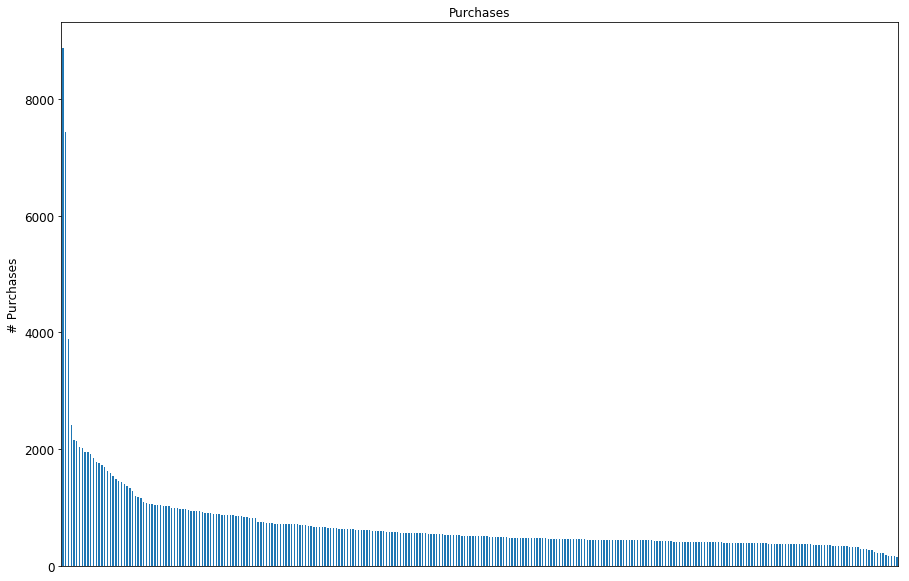

In [115]:
ax = sorted.plot(kind='bar', title ="Purchases", figsize=(15, 10), legend=False, fontsize=12)
ax.set_ylabel("# Purchases", fontsize=12)
ax.get_xaxis().set_visible(False)
plt.show()

Now, we can create a function that will return a list of the item recommendations:

In [185]:
def rec_items(customer_id, mf_train, user_vecs, item_vecs, customer_list, item_list, num_items = 10):
    '''
    This function returns the top recommended items to our users 
    
    parameters:
    
    customer_id - Input the customer's id number that you want to get recommendations for
    
    mf_train - The training matrix you used for matrix factorization fitting
    
    user_vecs - the user vectors from your fitted matrix factorization
    
    item_vecs - the item vectors from your fitted matrix factorization
    
    customer_list - an array of the customer's ID numbers that make up the rows of your ratings matrix 
                    (in order of matrix)
    
    item_list - an array of the products that make up the columns of your ratings matrix
                    (in order of matrix)
    

    num_items - The number of items you want to recommend in order of best recommendations. Default is 10. 
    
    returns:
    
    - The top n recommendations chosen based on the user/item vectors 
    '''
    
    cust_ind = np.where(customer_list == customer_id)[0][0] # Returns the index row of our customer id

    rec_vector = user_vecs[cust_ind,:].dot(item_vecs.T) # Get dot product of user vector and all item vectors

    product_idx = np.argsort(rec_vector)[::-1][:num_items] # Sort the indices of the items into order 
    # of best recommendations
    rec_list = [] # start empty list to store items
    for index in product_idx:
        code = item_list[index]
        rec_list.append(code) 

    return rec_list 

This will retrieve the $N$ highest ranking dot products between our user and item vectors for a particular user. Note that *items already purchased may still be recommended to the user*. I chose this because the problem was framed as a recommender for food items (as opposed to say books, which are usually purchased once), and there aren't many items. 

In [237]:
customers_arr = np.array(customers) # Array of customer IDs from the ratings matrix
products_arr = np.array(products) # Array of product IDs from the ratings matrix
rec_items(0, product_train, user_vecs, item_vecs, customers_arr, products_arr,
                       num_items = 10)

[5, 2, 17, 33, 1, 69, 63, 13, 21, 60]

Finally, we write our recommendations out to csv:

In [195]:
def process_recs(x):
    recs = rec_items(x, product_train, user_vecs, item_vecs, customers_arr, products_arr, num_items = 10)
    return '|'.join(map(str,recs))

In [239]:
#test = pd.read_csv("data/recommend_1.csv")
#recs = test.applymap(process_recs)
test = pd.read_csv("data/trx1.ab").iloc[:, [0]]

recs = test.applymap(process_recs)
out = pd.concat([test,recs],axis=1)
out.columns = ["customerId", "recommendedProducts"]
out.to_csv("data/recommend_1-ALSshort.csv",index=False)

# Submission

When you have completed your exercise, please email the following to your recruiter:
1. This Raw .ipynb file with the stdout included under your cells
1. An HTML export of the .ipynb file to ensure that no output is lost in submitting the raw .ipynb
    * [File] > [Download as] > [HTML (.html)]
1. The output CSV file, with format passing the below sanity check


In [231]:
### The following is used to validate your submission format
FILE_NAME = "/Users/cem3394/Documents/code/haskell/recommenders/alternate/data/recommend_1-KNN.csv" # Put your filename here

submission_file = open(FILE_NAME)
header = submission_file.readline()
columns = header.strip().split(",")
numColumns = 2
# check columns in the header
if len(columns) == 2 and columns[0] == "customerId" and columns[1] == "recommendedProducts":
  # The header matches the requirement of Option 1
  pass
elif len(columns) == 3 and columns[0] == "customerId" and columns[2] == "itemId" and columns[2] == "recommendedProducts":
  # The header matches the requirement of Option 2
  numColumns = 3
else:
  raise Exception("The header does not match the required format!")
  
# check data    
for (i, l) in enumerate(submission_file):
  fields = l.strip().split(",")
  if len(fields) != numColumns:
    raise Exception("Line %d does not have %d comma-separated fields!" %(i+1, numColumns))      
  if len(fields[-1].split("|")) != 10:
    raise Exception("Line %d does not have 10 recommended products!" %(i+1))

if i != 999:
  raise Exception("The submission file has %d lines (1000 expected)" %(i+1))

print("Your submission file has passed the format check!")

Your submission file has passed the format check!
